### Introduction

Welcome to Boston Massachusetts in the 1970s!

DATA [Source]('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) 

We are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc


To accomplish this task we will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [2]:
data = pd.read_csv('../input/Boston-property-data/boston.csv')


### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎

In [3]:
print(data.shape) # 506 data points
print(data.columns) # column names
print(data.head())
print(data.tail())
data.count() # number of rows

(506, 15)
Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  PRICE  
0  296.0     15.3  396.90   4.98   24.0  
1  242.0     17.8  396.90   9.14   21.6  
2  242.0     17.8  392.83   4.03   34.7  
3  222.0     18.7  394.63   2.94   33.4  
4  222.0     18.7  396.90   5.33   36.2  
     Unnamed: 0     CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
501         501  0.06263  0.0  11

Unnamed: 0    506
CRIM          506
ZN            506
INDUS         506
CHAS          506
NOX           506
RM            506
AGE           506
DIS           506
RAD           506
TAX           506
PTRATIO       506
B             506
LSTAT         506
PRICE         506
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [5]:
print(f'Any NaN values? {data.isna().values.any()}')
print(f'Any duplicates? {data.duplicated().values.any()}')

Any NaN values? False
Any duplicates? False


## Descriptive Statistics

In [6]:
data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


`CHAS` shows whether the home is next to the Charles River or not. As such, it only has the value 0 or 1. This kind of feature is also known as a dummy variable. 

The average price of a Boston home in the 1970s was 22.53 or $22,530.

## Visualise the Features
#### House Prices 💰


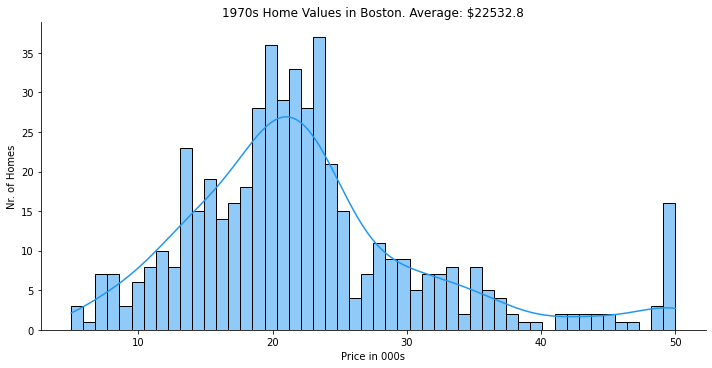

In [7]:
sns.displot(data['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

#### Distance to Employment - Length of Commute 🚗

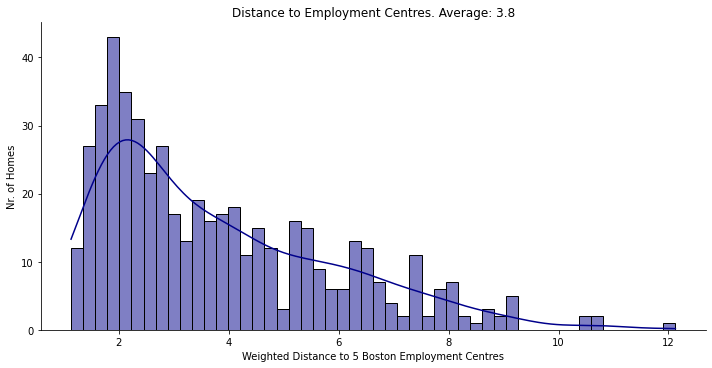

In [8]:
sns.displot(data.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

Most homes are about 3.8 miles away from work. There are fewer and fewer homes the further out we go.

#### Number of Rooms

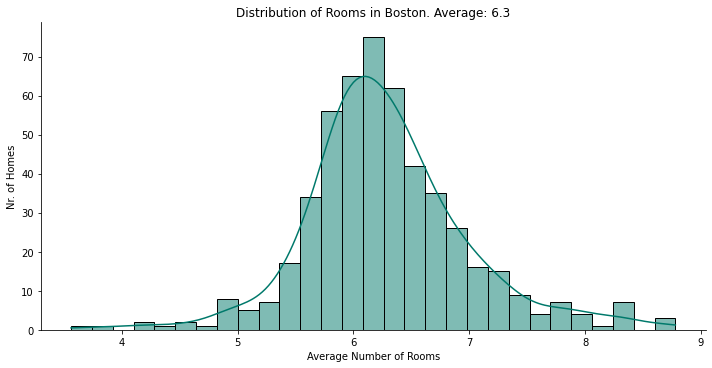

In [9]:
sns.displot(data.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways 🛣

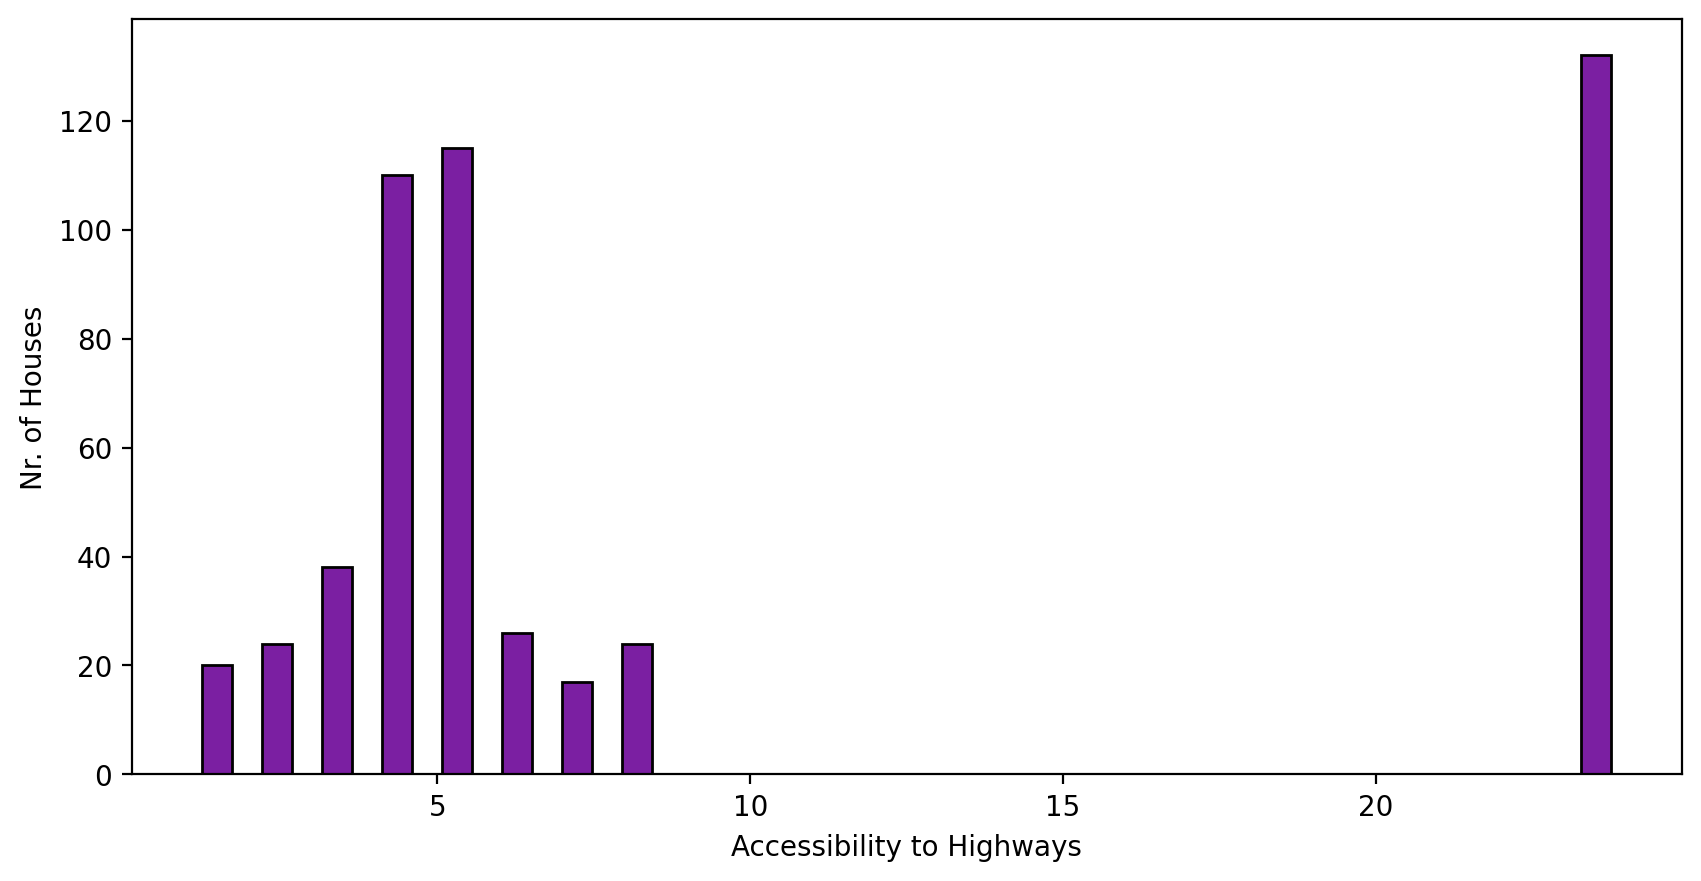

In [10]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

RAD is an index of accessibility to roads. Better access to a highway is represented by a higher number. There's a big gap in the values of the index. 

#### Next to the River? ⛵️

In [11]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

# Understand the Relationships in the Data

### Relationship using Pair Plot


There might be some relationships in the data that we should know about. Before you run the code, make some predictions to see hidden relations.

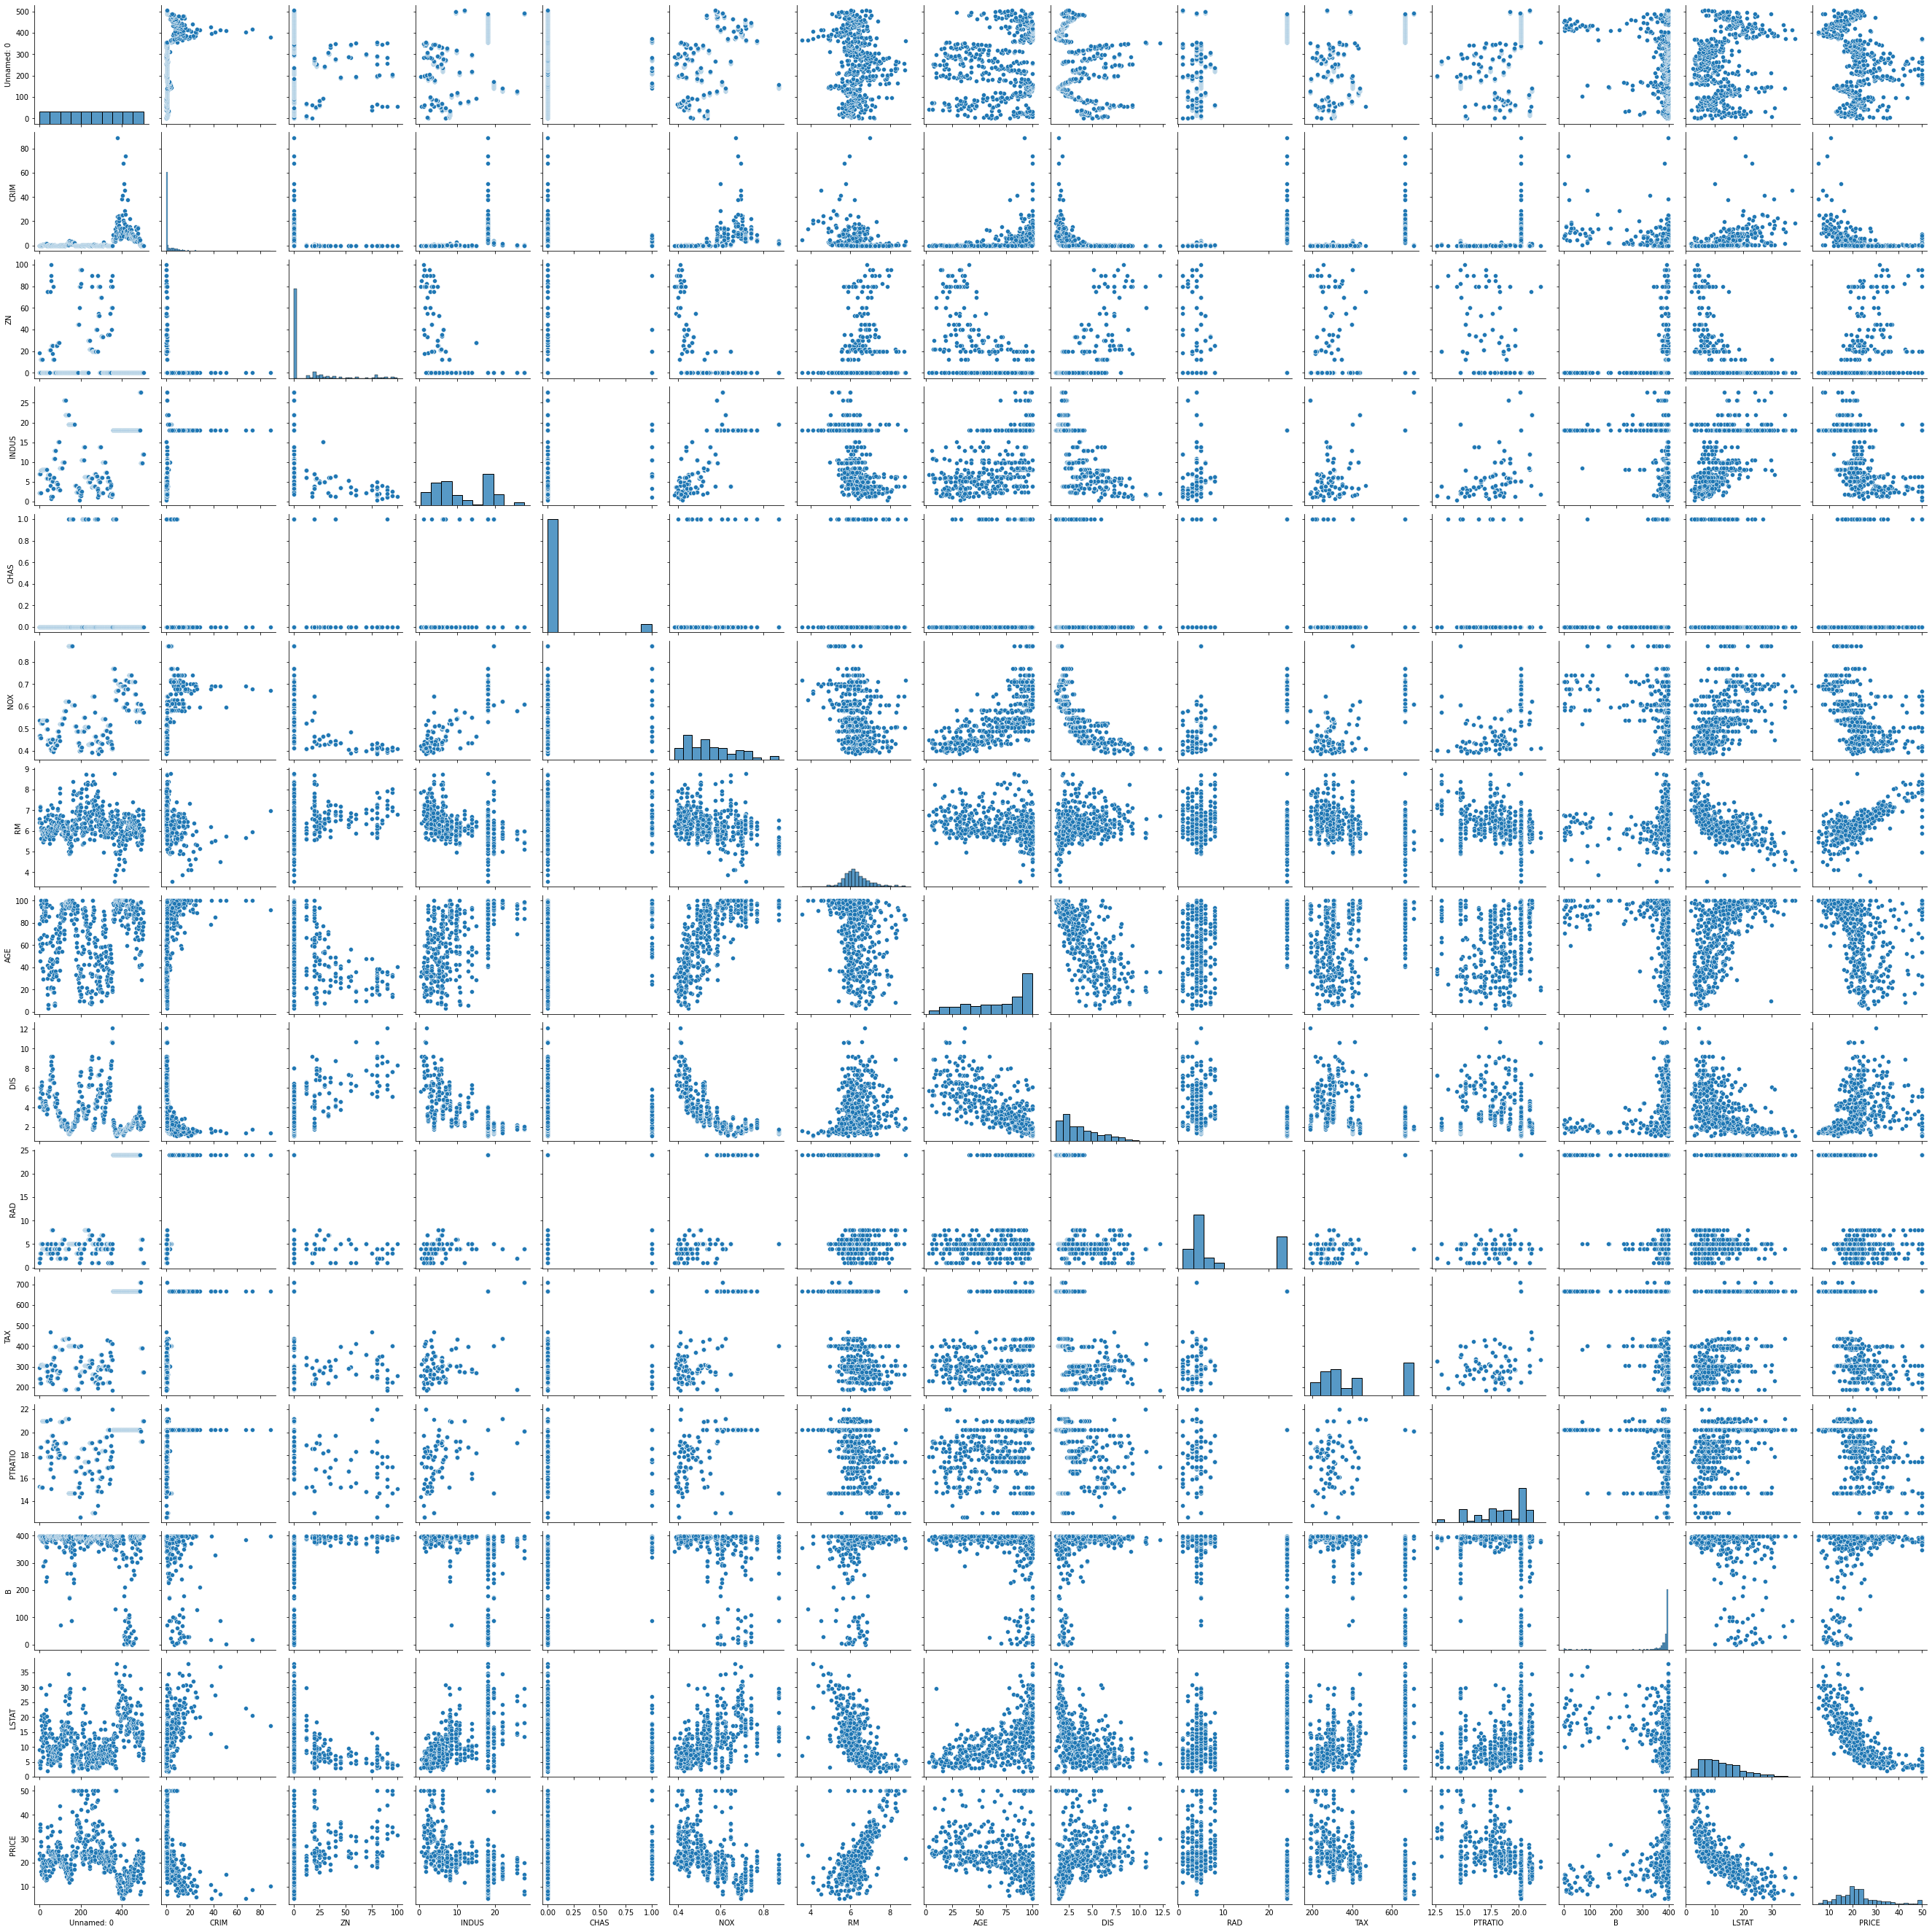

In [12]:
sns.pairplot(data)

# You can even include a regression line
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

#### Distance from Employment vs. Pollution


DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases? 

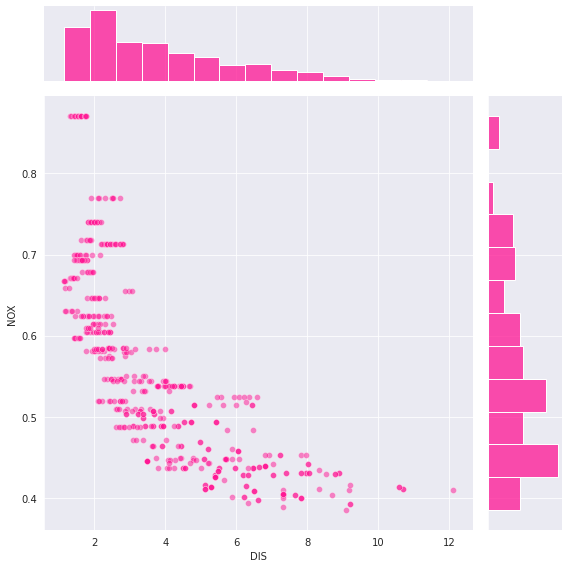

In [13]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'], 
                y=data['NOX'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

We see that pollution goes down as we go further and further out of town. This makes intuitive sense. However, even at the same distance of 2 miles to employment centres, we can get very different levels of pollution. By the same token, DIS of 9 miles and 12 miles have very similar levels of pollution. 

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

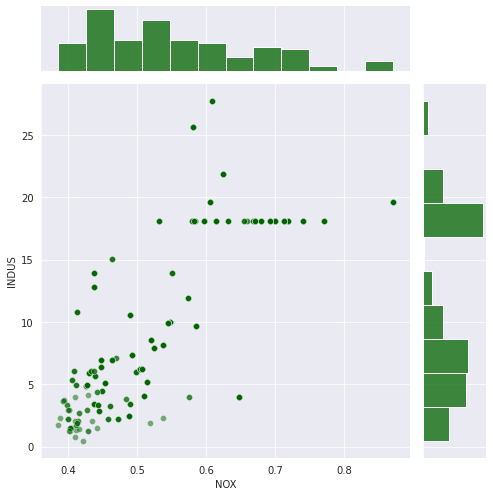

In [14]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.NOX, 
                y=data.INDUS, 
                # kind='hex', 
                height=7, 
                color='darkgreen',
                joint_kws={'alpha':0.5})
plt.show()

#### % of Lower Income Population vs Average Number of Rooms

LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

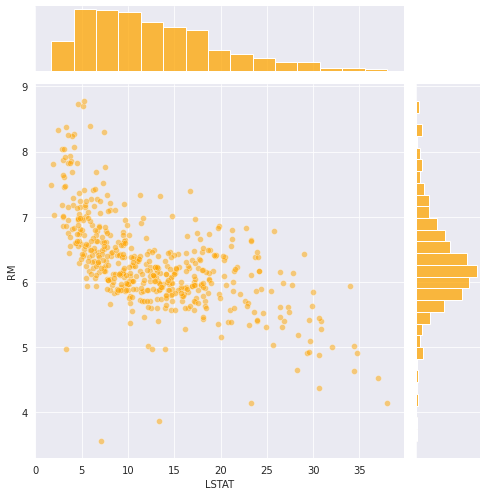

In [15]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'], 
                y=data['RM'], 
                # kind='hex', 
                height=7, 
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

In the top left corner we see that all the homes with 8 or more rooms, LSTAT is well below 10%. 

#### % of Lower Income Population versus Home Price

LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

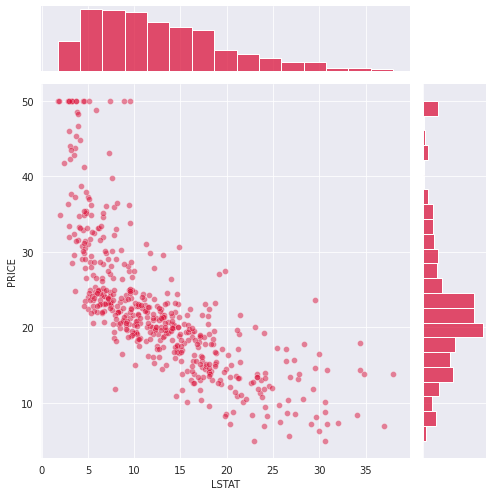

In [16]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.PRICE, 
                # kind='hex', 
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

#### Number of Rooms versus Home Value

RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊 

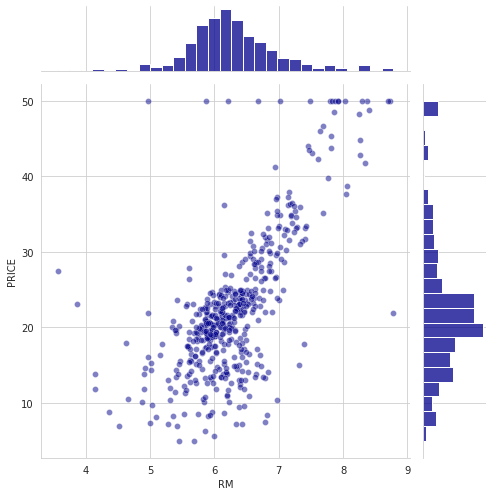

In [17]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.RM, 
                y=data.PRICE, 
                height=7, 
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. 


* Split the training and testing data roughly 80/20. 
* To get the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning. 


**target** is home PRICE, and **features** are all the other columns we'll use to predict the price. 

In [18]:
target = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [19]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')
# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression

We have a total of 13 features. So, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run First Regression


Check how high is the r-squared for the regression on the training data?

In [20]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


### Evaluating the Coefficients of the Model

The first thing to look for is if the coefficients have the expected sign (positive or negative). 


* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room?

In [21]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
Unnamed: 0,-0.002411
CRIM,-0.129545
ZN,0.064533
INDUS,-0.007466
CHAS,1.986908
NOX,-16.248233
RM,3.136214
AGE,0.014160
DIS,-1.498416
RAD,0.320774


In [22]:
# Premium for having an extra room
premium = regr_coef.loc['RM'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3136.2


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 



In [23]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

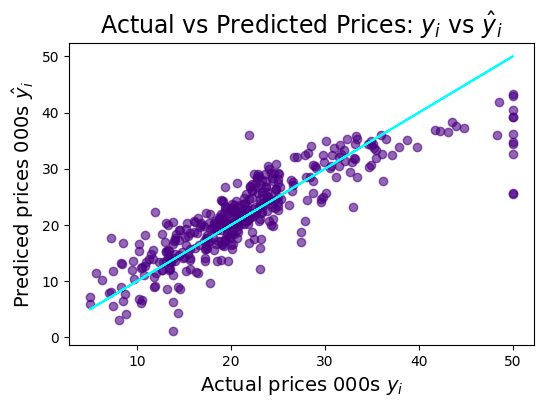

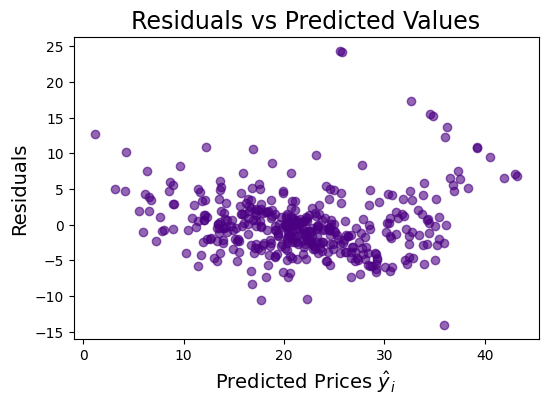

In [24]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. 

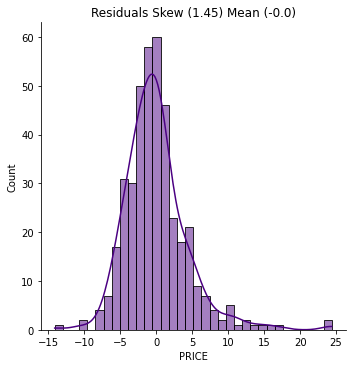

In [25]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

We see that the residuals have a skewness of 1.46. There could be some room for improvement here.  

### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 


Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation. 



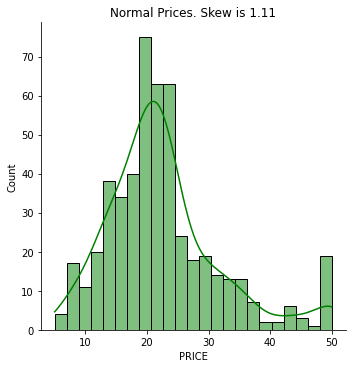

In [26]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

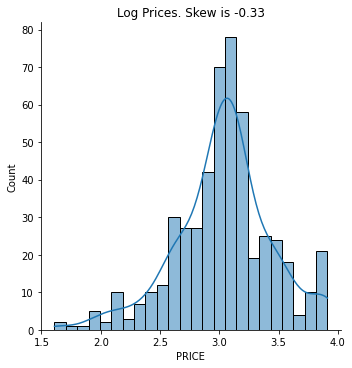

In [27]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals. 

#### How does the log transformation work?

We can see the relation between 2 when we plot the actual prices against the (transformed) log prices.

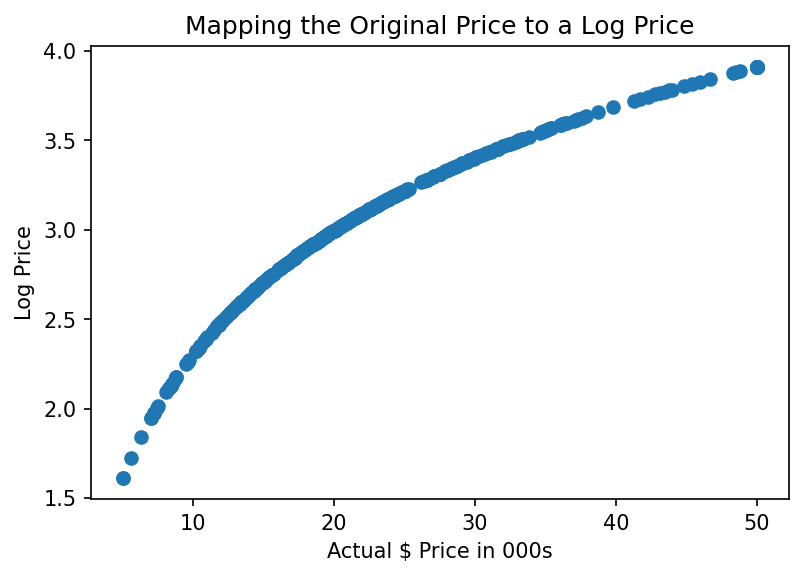

In [28]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. 

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$



In [29]:
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


This time we got an r-squared of 0.79 compared to 0.75. This looks like a promising improvement. 

## Evaluating Coefficients with Log Prices



In [30]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
Unnamed: 0,-0.000104
CRIM,-0.010731
ZN,0.001637
INDUS,0.002035
CHAS,0.080865
NOX,-0.703043
RM,0.074602
AGE,0.000671
DIS,-0.048298
RAD,0.015289


So how can we interpret the coefficients? The key thing we look for is still the sign - being close to the river results in higher property prices because CHAS has a coefficient greater than zero. Therefore property prices are higher next to the river. 

More students per teacher - a higher PTRATIO - is a clear negative. Smaller classroom sizes are indicative of higher quality education, so have a negative coefficient for PTRATIO. 

## Regression with Log Prices & Residual Plots



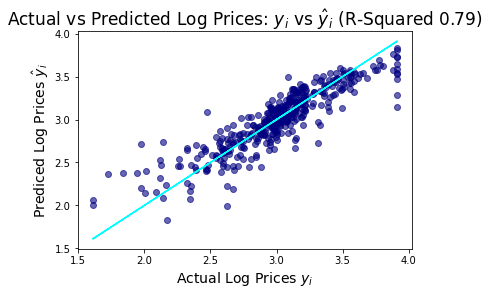

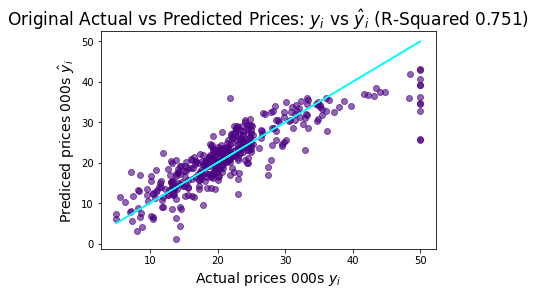

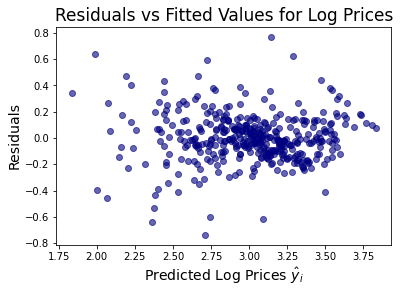

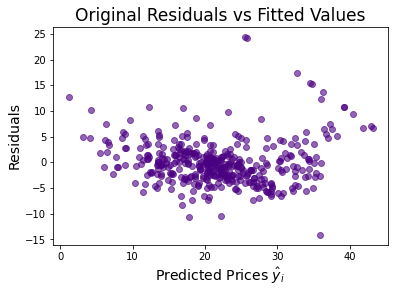

In [31]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

The predicted values seems slightly closer to the cyan line, but eyeballing the charts is not terribly helpful in this case. 

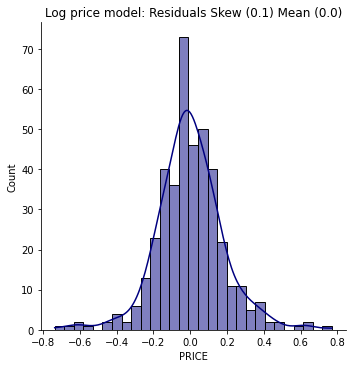

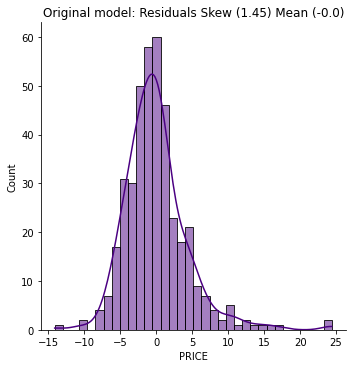

In [32]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

Our new regression residuals have a skew of 0.1 compared to a skew of 1.45. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation. 

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 


In [33]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.75


By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data. However, our r-squared still remains high, so we have built a useful model. 

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics

In [34]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,252.5,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063


In [35]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
# or use
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20696.9


A property with an average value for all the features has a value of $20,700. 

## Test Cases

In [36]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [37]:
# Set Property Characteristics
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [38]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25819.9
